In [560]:
import pandas as pd
import numpy as np
import seaborn as sns


In [561]:
House_df = pd.read_csv('./DataBase/train.csv')
House_df.info()
House_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Cleaning cells and
Conversion of variables into numbers.

In [562]:
#Variable: MSZoning
House_df["MSZoning"].isnull().sum() # No null values 
House_df['MSZoning'] = House_df['MSZoning'].replace({'A': 1, 'C (all)' : 2 , 'FV' : 3 , 'I': 4 , 'RH': 5, 'RL': 6 , 'RP':7, 'RM' : 8}) # Replace variables with numbers
#House_df['MSZoning'].head(50)

In [563]:
#Variable: MSSubClass
House_df["MSSubClass"].isnull().sum() # No null values 
# MSSubClass is already numerical

0

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

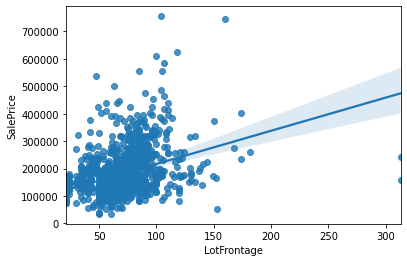

In [564]:
#Variable: LotFrontage
House_df.dropna(subset=['LotFrontage'],inplace=True)
sns.regplot(x = "LotFrontage" , y = "SalePrice" , data = House_df)


0


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

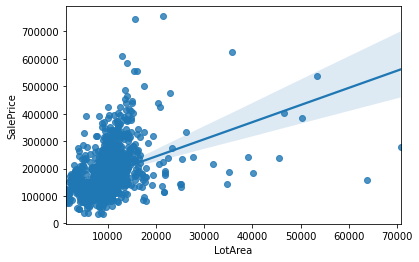

In [565]:
#Variable: LotArea
print(House_df["LotArea"].isnull().sum()) # No null values no cleaning needed
indx =  House_df[(House_df['LotArea']  > 100000)].index
House_df.drop(indx,inplace=True)
sns.regplot(x = "LotArea" , y = "SalePrice" , data = House_df)


In [566]:
#Variable: Street
print(House_df["Street"].isnull().sum()) # No null values no cleaning needed
arr = np.array([])
arr = House_df['Street']
arr = arr[arr == 'Grvl'] #numpy library
print(arr.size) #Only 6 entries out of 1460, this variable will be excluded.
House_df = House_df.drop(['Street'], axis = 1) #Drop this column

0
5


In [567]:
#Variable Alley
print(House_df["Alley"].isna().sum()) # 1369 NaN values, this variable will be excluded
House_df = House_df.drop(['Alley'], axis = 1)

1114


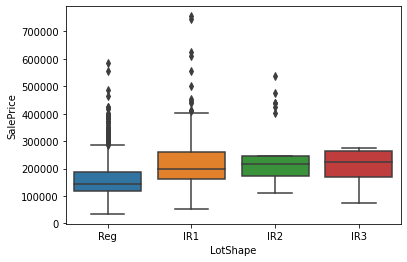

In [568]:
#Variable LotShape
sns.boxplot(x = House_df["LotShape"] , y = House_df["SalePrice"])
House_df = House_df.drop(['LotShape'], axis = 1)
## looking at the distributions of LotShape vs SalePrice we see that 
## the LotShape has little effect on the SalePrice

0


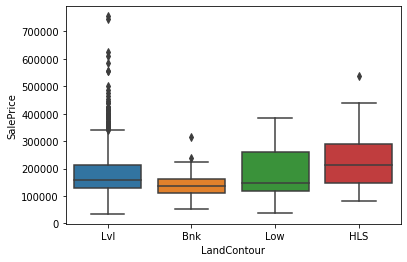

In [569]:
#Variable LandContour
print(House_df["LandContour"].isna().sum()) ## Check if there are NaN values
sns.boxplot(x = House_df["LandContour"] , y = House_df["SalePrice"])
House_df['LandContour'] = House_df['LandContour'].replace({'Lvl':1,'Bnk':2,'Low':3,'HLS':4})

In [570]:
#variable Utilities
arr = np.array([])
arr = House_df['Utilities']
arr = arr[arr == 'AllPub']
print(arr.size)
House_df = House_df.drop(['Utilities'], axis = 1) # all homes have the same value for this characteristic


1200


0


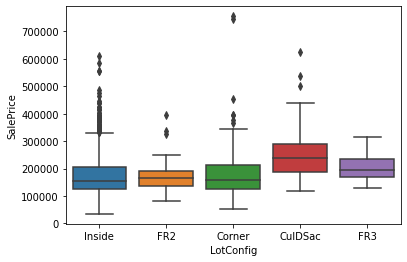

In [571]:
#variable LotConfig
print(House_df["LotConfig"].isna().sum())
sns.boxplot(x = House_df["LotConfig"] , y = House_df["SalePrice"])
House_df['LotConfig'] = House_df['LotConfig'].replace({'Inside':1,'FR2':2,'Corner':3,'CulDSac':4,'FR3':5})

0


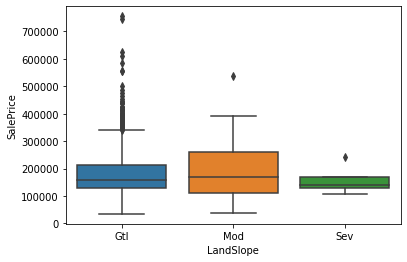

In [572]:
#variable LandSlope
print(House_df['LandSlope'].isna().sum()) # no null values
sns.boxplot(x = House_df['LandSlope'],y=House_df['SalePrice']) #little effect of final sale price
House_df = House_df.drop(['LandSlope'], axis = 1)

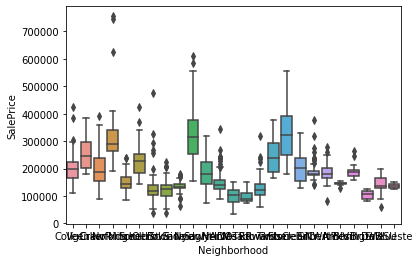

In [573]:
#variable Neighborhood
sns.boxplot(x = House_df["Neighborhood"] , y = House_df["SalePrice"])
House_df['Neighborhood'] = House_df['Neighborhood'].replace({'Blmngtn':1,'Blueste':2,'BrDale':3,'BrkSide':4,'ClearCr':5,'CollgCr':6,'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10,'MeadowV':11,'Mitchel':12,'NAmes':13,'NoRidge':14,'NPkVill':15,'NridgHt':16,'NWAmes':17,'OldTown':18,'SWISU':19,'Sawyer':20,'SawyerW':21,'Somerst':22,'StoneBr':23,'Timber':24,'Veenker':25})

0


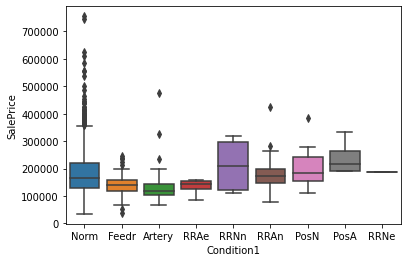

In [574]:
#var condition1
print(House_df['Condition1'].isna().sum()) # no null values
sns.boxplot(x = House_df['Condition1'],y= House_df['SalePrice'] )
House_df['Condition1'] = House_df['Condition1'].replace({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})

In [575]:
#var condition2
House_df = House_df.drop(['Condition2'], axis = 1)

0


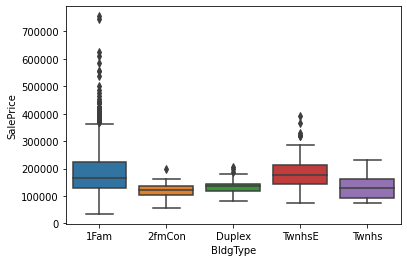

In [576]:
#var BldgType
print(House_df['BldgType'].isna().sum()) # no null values
sns.boxplot(x = House_df['BldgType'],y=House_df['SalePrice'])
House_df['BldgType'] = House_df['BldgType'].replace({'1Fam':1,'2FmCon':2,'Duplx':3,'TwnhsE':4,'TwnhsI':5 , '2fmCon':2,'Duplex':3,'Twnhs':0})

0


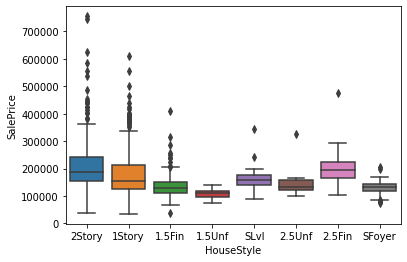

In [577]:
#var HouseStyle
print(House_df['HouseStyle'].isna().sum())
sns.boxplot(x=House_df['HouseStyle'],y=House_df['SalePrice'])
House_df['HouseStyle'] = House_df['HouseStyle'].replace({'1Story':1,'1.5Fin':2,'1.5Unf':3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8})

In [578]:
#var overallQual and condition
print(House_df['OverallQual'].isna().sum())
print(House_df['OverallCond'].isna().sum())
print(House_df['YearBuilt'].isna().sum())
print(House_df['YearRemodAdd'].isna().sum())

0
0
0
0


In [579]:
#var roofstyle and roofMatl
House_df = House_df.drop(['RoofStyle'], axis = 1)
House_df = House_df.drop(['RoofMatl'], axis = 1)
House_df = House_df.drop(['Foundation'],axis =1 )

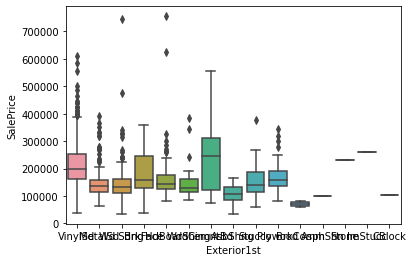

In [580]:

sns.boxplot(x= House_df['Exterior1st'], y=House_df['SalePrice'])
House_df['Exterior1st'] = House_df['Exterior1st'].replace({'AsbShng':1,'AsphShn':2,'BrkComm':3,'BrkFace':4,'CBlock':5,'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17})
House_df = House_df.drop(['Exterior2nd'], axis = 1)


0
0


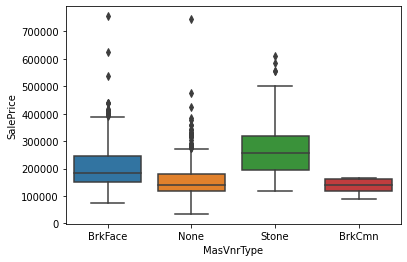

In [581]:
House_df.dropna(subset=['MasVnrType'],inplace=True)
print(House_df['MasVnrType'].isna().sum())
sns.boxplot(x=House_df['MasVnrType'], y= House_df['SalePrice'])
House_df['MasVnrType'] = House_df['MasVnrType'].replace({'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':4,'Stone':5})
print(House_df['MasVnrArea'].isna().sum())

In [582]:
# ExterQual and ExterCond
print(House_df['ExterQual'].isna().sum())
print(House_df['ExterCond'].isna().sum())
House_df['ExterQual'] = House_df['ExterQual'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
House_df['ExterCond'] = House_df['ExterCond'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})

0
0


In [583]:
#basment
House_df['BsmtQual'] = House_df['BsmtQual'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':0})
House_df['BsmtCond'] = House_df['BsmtCond'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':0})
House_df.dropna(subset=['BsmtQual'],inplace=True)
House_df = House_df.drop(['BsmtExposure'], axis = 1)
House_df = House_df.drop(['BsmtFinType1'], axis = 1)
House_df = House_df.drop(['BsmtFinSF1'], axis = 1)
House_df = House_df.drop(['BsmtFinType2'], axis = 1)
House_df = House_df.drop(['BsmtFinSF2'], axis = 1)
House_df = House_df.drop(['BsmtUnfSF'],axis=1)
print(House_df['BsmtQual'].isna().sum())
print(House_df['TotalBsmtSF'].isna().sum())


0
0


In [584]:
print(House_df['Heating'].isna().sum())
House_df['Heating'] = House_df['Heating'].replace({'Floor':1,'GasA':2,'GasW':3,'Grav':4,'OthW':5,'Wall':6})
print(House_df['HeatingQC'].isna().sum())
House_df['HeatingQC'] = House_df['HeatingQC'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
print(House_df['CentralAir'].isna().sum())
House_df['CentralAir'] = House_df['CentralAir'].replace({'N':0,'Y':1})
print(House_df['Electrical'].isna().sum())
House_df.dropna(subset=['Electrical'],inplace=True)
House_df['Electrical'] = House_df['Electrical'].replace({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5})


0
0
0
1


In [585]:
print(House_df['1stFlrSF'].isna().sum())
print(House_df['2ndFlrSF'].isna().sum())
print(House_df['GrLivArea'].isna().sum())
print(House_df['LowQualFinSF'].isna().sum())
House_df = House_df.drop(['BsmtFullBath'],axis=1)
House_df = House_df.drop(['BsmtHalfBath'],axis=1)
print(House_df['FullBath'].isna().sum())
print(House_df['HalfBath'].isna().sum())


0
0
0
0
0
0


In [586]:
print(House_df['BedroomAbvGr'].isna().sum())
House_df = House_df.drop(['KitchenAbvGr'],axis=1)

0


In [587]:
print(House_df['TotRmsAbvGrd'].isna().sum())
House_df['KitchenQual'] = House_df['KitchenQual'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
House_df = House_df.drop(['Functional'],axis=1)
House_df = House_df.drop(['SaleCondition'],axis=1)
House_df = House_df.drop(['SaleType'],axis=1)
House_df = House_df.drop(['MoSold'],axis=1)
House_df = House_df.drop(['MiscFeature'],axis=1)
House_df = House_df.drop(['Fence'],axis=1)
House_df = House_df.drop(['PoolQC'],axis=1)
House_df = House_df.drop(['GarageFinish'],axis=1)
House_df.dropna(subset=['GarageType'],inplace=True)
House_df['FireplaceQu'] = House_df['FireplaceQu'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':0,})

0


In [588]:
House_df['FireplaceQu'] = House_df['FireplaceQu'].fillna(0)

House_df['PavedDrive'] = House_df['PavedDrive'].replace({'Y':1,'P':2,'N':0})
House_df['GarageCond'] = House_df['GarageCond'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':0})
House_df['GarageQual'] = House_df['GarageQual'].replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':0})
House_df['GarageType'] = House_df['GarageType'].replace({'2Types':1,'Attchd':2,'Basment':3,'BuiltIn':4,'CarPort':5,'Detchd':6,'NA':0})

print(House_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1095 non-null   int64  
 1   MSSubClass     1095 non-null   int64  
 2   MSZoning       1095 non-null   int64  
 3   LotFrontage    1095 non-null   float64
 4   LotArea        1095 non-null   int64  
 5   LandContour    1095 non-null   int64  
 6   LotConfig      1095 non-null   int64  
 7   Neighborhood   1095 non-null   int64  
 8   Condition1     1095 non-null   int64  
 9   BldgType       1095 non-null   int64  
 10  HouseStyle     1095 non-null   int64  
 11  OverallQual    1095 non-null   int64  
 12  OverallCond    1095 non-null   int64  
 13  YearBuilt      1095 non-null   int64  
 14  YearRemodAdd   1095 non-null   int64  
 15  Exterior1st    1095 non-null   int64  
 16  MasVnrType     1095 non-null   int64  
 17  MasVnrArea     1095 non-null   float64
 18  ExterQua